In [1]:
import pandas as pd 
import numpy as np

In [2]:
DATA_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining/main/PART2/Day14-NLP/notebooks/datasets/"

DATASET_PATH = DATA_DIR + "yorumsepeti.csv"

In [3]:
DATASET_PATH

'https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining/main/PART2/Day14-NLP/notebooks/datasets/yorumsepeti.csv'

In [4]:
df = pd.read_csv(DATASET_PATH, sep=';')
df

,speed,service,flavour,review
0,-,1,1,Her zaman komşu fırından sipariş verdiğim için...
1,-,10,2,sosisli ürün isteyen adama peynirli bişey yol...
2,-,10,10,Siparisimi cok hizli getiren ekip arkadasiniza...
3,1,1,7,"After waiting more tjan one hour, they didnt d..."
4,4,4,1,Iyi pişsin diye söylememe rağmen az pişmiş gel...
...,...,...,...,...
60237,10,10,10,Super.
60238,10,10,10,Mükemmelsiniz.
60239,10,10,10,Çorbası efsane mutlaka deneyin.
60240,10,10,10,Harikasınız!


In [5]:
print("Dataset size:", len(df))

Dataset size: 60242


In [6]:
pd.isna(df['review']).sum()

33

In [7]:
df = df.dropna(subset=['review'], axis=0)
print("Dataset size:", len(df))

Dataset size: 60209


In [8]:
# We will use the mean of 3 point scoring system
# so we will change the dataset to target-text

df['speed'] = df['speed'].replace(['-'], np.nan)
df['service'] = df['service'].replace(['-'], np.nan)
df['flavour'] = df['flavour'].replace(['-'], np.nan)

df['speed'] = df['speed'].astype(float)
df['service'] = df['service'].astype(float)
df['flavour'] = df['flavour'].astype(float)
df['review'] = df['review'].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

**3 çeşit puanlamanın ortalamasına göre ikili sınıflandırma yapabilmek için hedef sütun oluşturma**

In [9]:
df = df.assign(target=df.loc[:, ['speed', 'service', 'flavour']].mean(axis=1))
df['target'] = round(df['target'])

df = df.dropna(subset=['target'], axis=0)
df['target'] = df['target'].astype(int)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,speed,service,flavour,review,target
0,NaN,1.0,1.0,Her zaman komşu fırından sipariş verdiğim için...,1
1,NaN,10.0,2.0,sosisli ürün isteyen adama peynirli bişey yol...,6
2,NaN,10.0,10.0,Siparisimi cok hizli getiren ekip arkadasiniza...,10
3,1.0,1.0,7.0,"After waiting more tjan one hour, they didnt d...",3
4,4.0,4.0,1.0,Iyi pişsin diye söylememe rağmen az pişmiş gel...,3
...,...,...,...,...,...
60237,10.0,10.0,10.0,Super.,10
60238,10.0,10.0,10.0,Mükemmelsiniz.,10
60239,10.0,10.0,10.0,Çorbası efsane mutlaka deneyin.,10
60240,10.0,10.0,10.0,Harikasınız!,10


**Hedef sütununda ortalama puanlarımız var. 1-5 puan eksiye, 6-10 puan artıya karşılık gelir şeklinde haritalandırıyoruz. Son bölümde nötr toplama için eşik olarak 0,4-0,7 kullanacağız.**

In [10]:
decode_map = { 1:"NEGATIVE", 2:"NEGATIVE" ,3: "NEGATIVE", 4:"NEGATIVE", 5:"NEGATIVE",6: "POSITIVE",
              7: "POSITIVE", 8: "POSITIVE", 9: "POSITIVE", 10: "POSITIVE"}
              
def decode_sentiment(label):
    return decode_map[int(label)]

In [11]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 36.9 ms, sys: 501 µs, total: 37.4 ms
Wall time: 41.1 ms


In [12]:
df

,speed,service,flavour,review,target
0,NaN,1.0,1.0,Her zaman komşu fırından sipariş verdiğim için...,NEGATIVE
1,NaN,10.0,2.0,sosisli ürün isteyen adama peynirli bişey yol...,POSITIVE
2,NaN,10.0,10.0,Siparisimi cok hizli getiren ekip arkadasiniza...,POSITIVE
3,1.0,1.0,7.0,"After waiting more tjan one hour, they didnt d...",NEGATIVE
4,4.0,4.0,1.0,Iyi pişsin diye söylememe rağmen az pişmiş gel...,NEGATIVE
...,...,...,...,...,...
60237,10.0,10.0,10.0,Super.,POSITIVE
60238,10.0,10.0,10.0,Mükemmelsiniz.,POSITIVE
60239,10.0,10.0,10.0,Çorbası efsane mutlaka deneyin.,POSITIVE
60240,10.0,10.0,10.0,Harikasınız!,POSITIVE


Text(0.5, 1.0, 'Dataset labels distribuition')

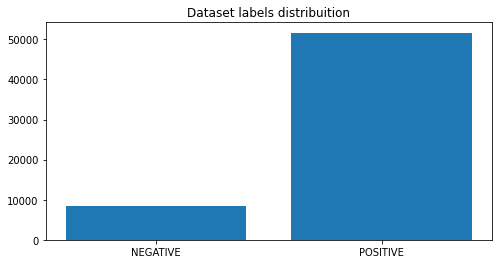

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

target_cnt = Counter(df.target)

plt.figure(figsize=(8,4))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

**YAPILACAKLAR: review'leri target alanındaki POSITIVE ve NEGATIF olarak sınıf olarak sınıflayan model eğitiniz.**

**Confusion Matrix ve Classification Report ile başarımınızı değerlendirin.**


**Aşağıdaki cümleler ile test edilecek:**

- "Lütfen şu yemeği düzgün pişirin"
- "İşini aşkla yapan bir mekan daha sarrrrdı"
- "Kuryeniz çok saygısız"
- "lezzet sıfır kalite sıfır hizmet sıfır ekmek arası ekmek de göndermezsiniz."
- "EFFFFSANEYDİ BEEE"
- "Ellerinize sağlık çok güzeldi"
- "Bi tantuni yiyelim dedik kusacaktık reziller sizi"
- "Hep buradan alıyoruz yine memnunuz teşekkürler"
- "bir daha burdan almayın paranıza yazık"
- "Bugün günlerden açlık günü zannetmiştim ama varya biliyosunuz bu işi."

